# Plotting Tools

In [36]:
import os
import csv
import glob

import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

### Basic plotting example

[0.02117185 0.02573893 0.02480776 0.03227573 0.02017415 0.03417376
 0.02947066 0.02604646 0.03490775 0.03469557 0.0369549  0.01831339
 0.03192434 0.02920138 0.02703384 0.03540142 0.01269747 0.02812796
 0.0334169  0.03398571 0.03152805 0.03609425 0.03569249 0.03157567
 0.0417366  0.03487699 0.03625689 0.03507457 0.03468261 0.03550249
 0.03508538 0.03645342 0.03613742 0.03386998 0.03591672 0.03568943
 0.0384969  0.0355764  0.03629886 0.03456103]


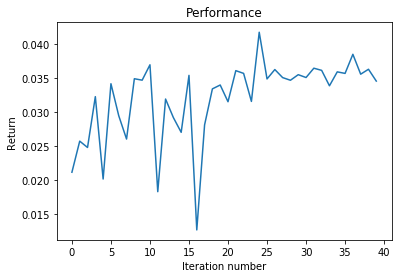

In [56]:
log_dir = '/home/vitchyr/git/handful-of-trials/log/test/2019-06-28--10:38:25'          # Directory specified in script, not including date+time
min_num_trials = 40   # Plots up to this many trials


all_returns = []
# for subdir in os.listdir(log_dir):
for log_file in glob.glob(log_dir + "/*/logs.mat"):
#     data = loadmat(os.path.join(log_dir, subdir, "logs.mat"))
    data = loadmat(log_file)
    if data["returns"].shape[1] >= min_num_trials:
        all_returns.append(data["returns"][0][:min_num_trials])

min_num_trials = min(map(len, all_returns))
max_num_trials = max(map(len, all_returns))
returns = np.array(all_returns)
# returns = np.maximum.accumulate(returns, axis=-1)
mean = np.mean(returns, axis=0)

print(mean)

# Plot result
plt.figure()
plt.plot(np.arange(len(mean)), mean)
plt.title("Performance")
plt.xlabel("Iteration number")
plt.ylabel("Return")
plt.show()

In [52]:
print(log_file)
data= loadmat(log_file)
data['actions'].shape

/home/vitchyr/git/handful-of-trials/log/test/2019-06-28--10:38:25/train_iter43/logs.mat


(44, 2, 1)

In [57]:
print(min_num_trials)
print(max_num_trials)

40
40


In [26]:
print(type(mean))
print(mean.shape)

<class 'numpy.ndarray'>
(1,)
